In [1]:
import pandas as pd, os

In [2]:
# for saving figures
import datetime
today = datetime.date.today().isoformat()
basepath = '../../graphics/codedtruth'

In [3]:
base = '../../data/codedtruth'
os.listdir(base)

['.DS_Store',
 'paper_metadata.csv',
 'papertags_how_withwhom_final.csv',
 'papertags_what_final.csv',
 'truth_metadata.csv',
 'truth_overflow.csv',
 'truth_ratings.csv',
 'v_11_coded_final.csv',
 'v_16_coded_final.csv',
 'v_19_coded_final.csv',
 'v_6_coded_final.csv',
 'v_8345etseq_final.csv',
 'v_8780etseq_final.csv']

In [134]:
dfdict = {x[:-4]:pd.read_csv(f'{base}/{x}') for x in os.listdir(base) 
          if x.endswith('.csv') and 'coded' not in x}

In [135]:
dfdict.keys()

dict_keys(['paper_metadata', 'papertags_how_withwhom_final', 'papertags_what_final', 'truth_metadata', 'truth_overflow', 'truth_ratings', 'v_8345etseq_final', 'v_8780etseq_final'])

In [6]:
def split_tags(old_df, level_4=False):
    df = pd.DataFrame(old_df, copy=True)
    levels = [x.split(':') for x in df.Tag]
    df['level_1'] = [x[0] for x in levels]
    df['level_2'] = [x[1] for x in levels]
    df['level_3'] = [x[2].split('_')[0] for x in levels]
    if level_4:
        df['level_4'] = [x[2].split('_')[1] if '_' in x[2] else '' for x in levels]
    return df

In [7]:
all_levels = [f'level_{x}' for x in range(1,5)]
all_ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']
all_ratings_sorted = [f'{idx}_{rating}' for idx, rating in enumerate(all_ratings)]

Overview of the paper tags - the same as in chapter 2

In [8]:
papertags_method = split_tags(dfdict['papertags_how_withwhom_final'], level_4=False)
papertags_content = split_tags(dfdict['papertags_what_final'], level_4=True)

In [9]:
print(papertags_method.shape, papertags_content.shape)

(501, 6) (940, 7)


In [13]:
#papertags_method.groupby(all_levels).count()

In [12]:
#papertags_content.groupby(all_levels).count()[['Tag']]

In [10]:
def ratings_with_papertags(ratingsdf, tagdf, all_levels, all_ratings, all_ratings_sorted, rel=False):
    ratingsdf = ratingsdf.replace(all_ratings,all_ratings_sorted)
    df = ratingsdf.merge(tagdf).drop(['PaperSummary', 'Tag', 'lfdn'], axis=1
                                    ).groupby(all_levels + ['rating']).count(
    ).rename({'PaperID':'count'}, axis=1).unstack().fillna(0)
    df['pos'] = df[('count', all_ratings_sorted[0])] + df[('count', all_ratings_sorted[1])]
    df['neg'] = df[('count', all_ratings_sorted[2])] + df[('count', all_ratings_sorted[3])]
    df['total'] = df[('pos')] + df[('neg')]
    if rel:
        for col in df.columns:
            df[col] = df[col] / df['total']
    return df

In [11]:
%matplotlib notebook
import seaborn as sns, matplotlib.pyplot as plt, numpy as np
sns.set_style('darkgrid')

In [12]:
def plot_tag_ratings(df, mode='abs'):
    df.drop(['total','pos','neg'], axis=1).plot.barh(stacked=True, cmap='bwr', figsize=(9,6), alpha=0.5)
    plt.legend([])
    plt.ylabel('')
    if mode == 'abs':
        maxval = df['total'].max()
        upperbound = (divmod(maxval,100)[0]+1)*100
        plt.xlim((0,upperbound))
        plt.xticks(np.arange(0,upperbound+1,100))
    elif mode == 'rel':
        plt.xlim((0,1))
        plt.xticks(np.arange(0,1.01,0.1))
    plt.tight_layout()
    
def save_plot(filename):
    plt.savefig(f'{basepath}/{today}_{filename}.pdf')

### Paper Methodology

#### How?

In [13]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted
                      ).loc['how'].sort_values(
    [('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], na_position='first', ascending=False).astype(int)

count                                      \
rating                    0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2     level_3                                                         
engineering methodology           244          403           200       38   
science     observation           102          185            90       14   
            interrogation          70          103            53        7   
perspective experience             30           89            56        7   
science     intervention           19           96            69       13   
engineering technology             28           70            49        7   
perspective review                 12           30            23        3   
            opinion                 8           22            14        1   
engineering reference              10           11             4        1   
perspective philosophy              1            3             1        1   

                           pos  neg total  
rating                                     
level_2     level_3                        
engineering methodology    647  238   885  
science     observation    287  104   391  
            interrogation  173   60   233  
perspective experience     119   63   182  
science     intervention   115   82   197  
engineering technology      98   56   154  
perspective review          42   26    68  
            opinion         30   15    45  
engineering reference       21    5    26  
perspective philosophy       4    2     6

<IPython.core.display.Javascript object>


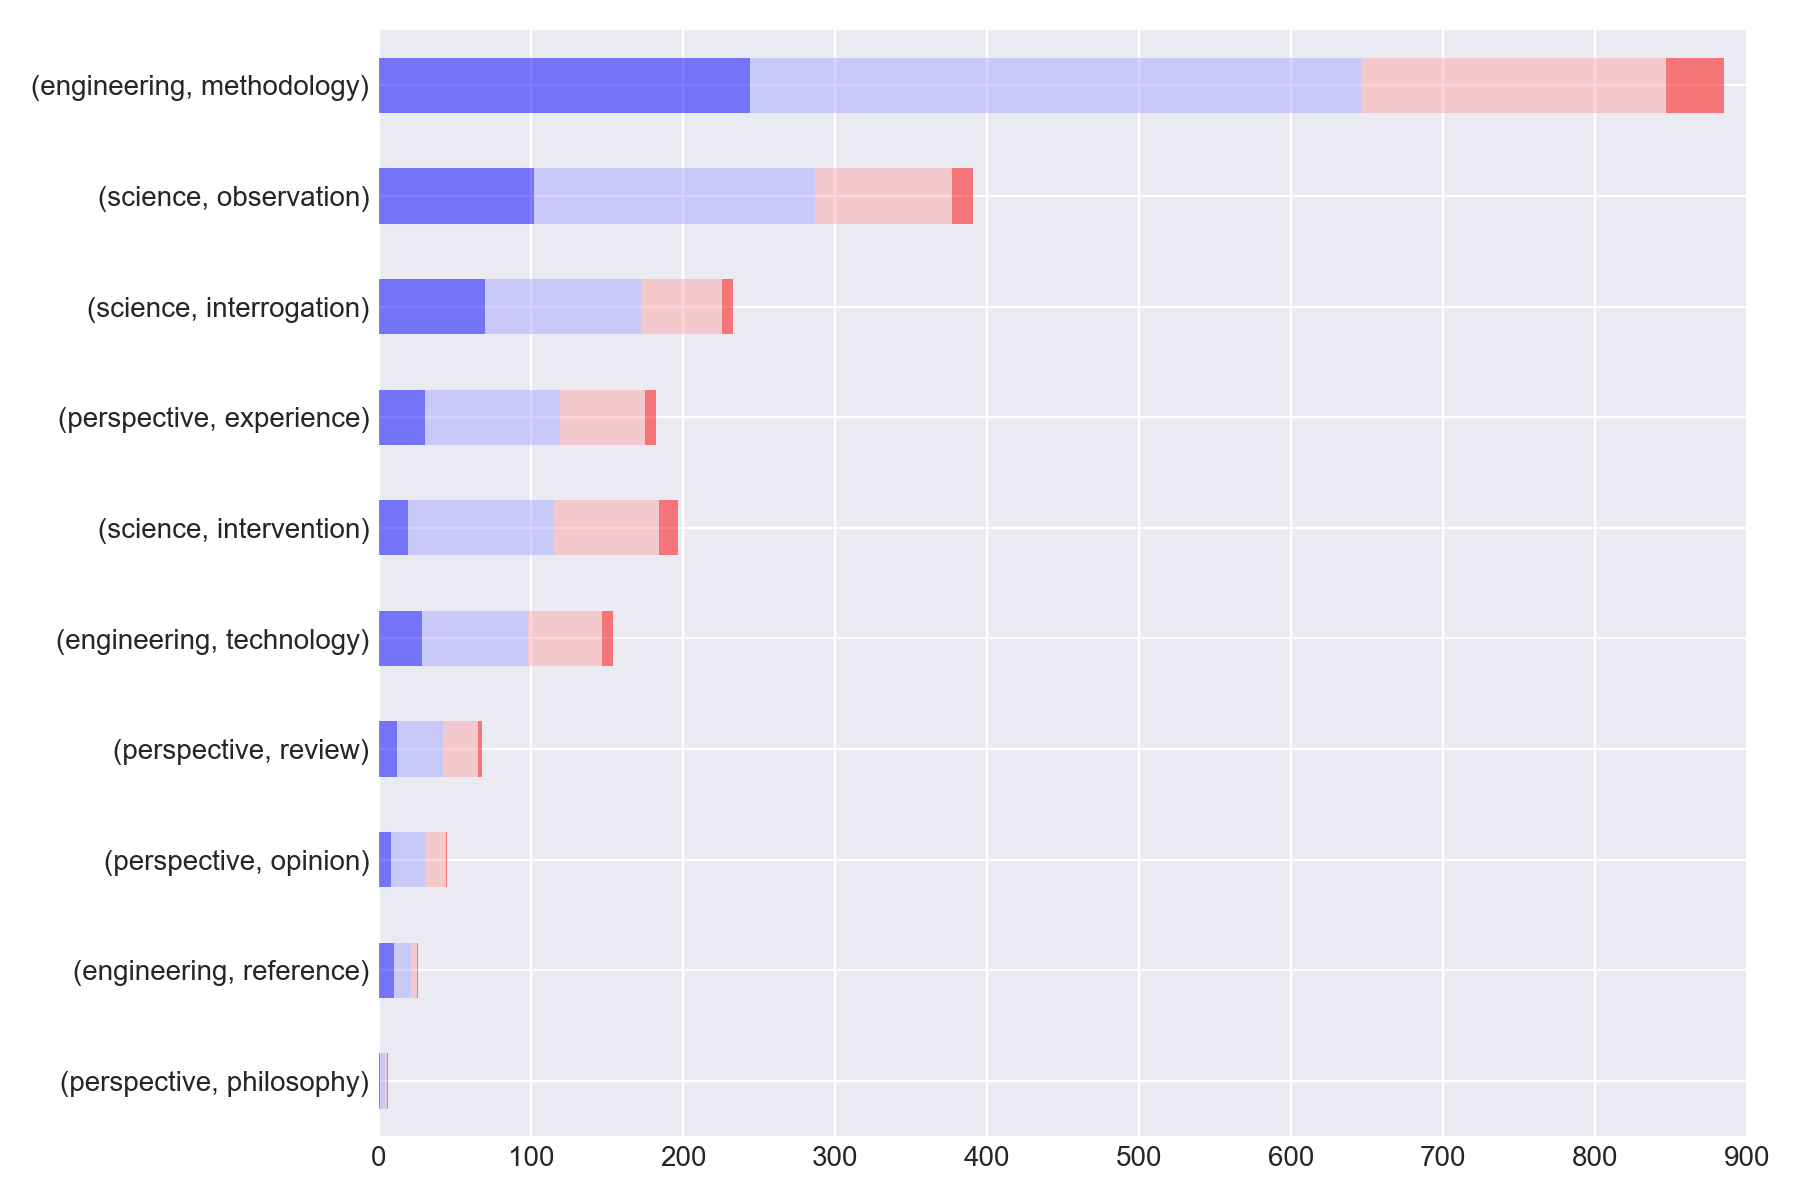

In [37]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted
                      ).loc['how'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='abs')
save_plot('papertags_method_how_absolute')

In [14]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['how'].sort_values(
    [('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], ascending=False, na_position='last')

count                                       \
rating                    0_Essential 1_Worthwhile 2_Unimportant  3_Unwise   
level_2     level_3                                                          
engineering reference        0.384615     0.423077      0.153846  0.038462   
science     interrogation    0.300429     0.442060      0.227468  0.030043   
            observation      0.260870     0.473146      0.230179  0.035806   
engineering methodology      0.275706     0.455367      0.225989  0.042938   
perspective opinion          0.177778     0.488889      0.311111  0.022222   
            philosophy       0.166667     0.500000      0.166667  0.166667   
            experience       0.164835     0.489011      0.307692  0.038462   
engineering technology       0.181818     0.454545      0.318182  0.045455   
perspective review           0.176471     0.441176      0.338235  0.044118   
science     intervention     0.096447     0.487310      0.350254  0.065990   

                                pos       neg total  
rating                                               
level_2     level_3                                  
engineering reference      0.807692  0.192308   1.0  
science     interrogation  0.742489  0.257511   1.0  
            observation    0.734015  0.265985   1.0  
engineering methodology    0.731073  0.268927   1.0  
perspective opinion        0.666667  0.333333   1.0  
            philosophy     0.666667  0.333333   1.0  
            experience     0.653846  0.346154   1.0  
engineering technology     0.636364  0.363636   1.0  
perspective review         0.617647  0.382353   1.0  
science     intervention   0.583756  0.416244   1.0

<IPython.core.display.Javascript object>


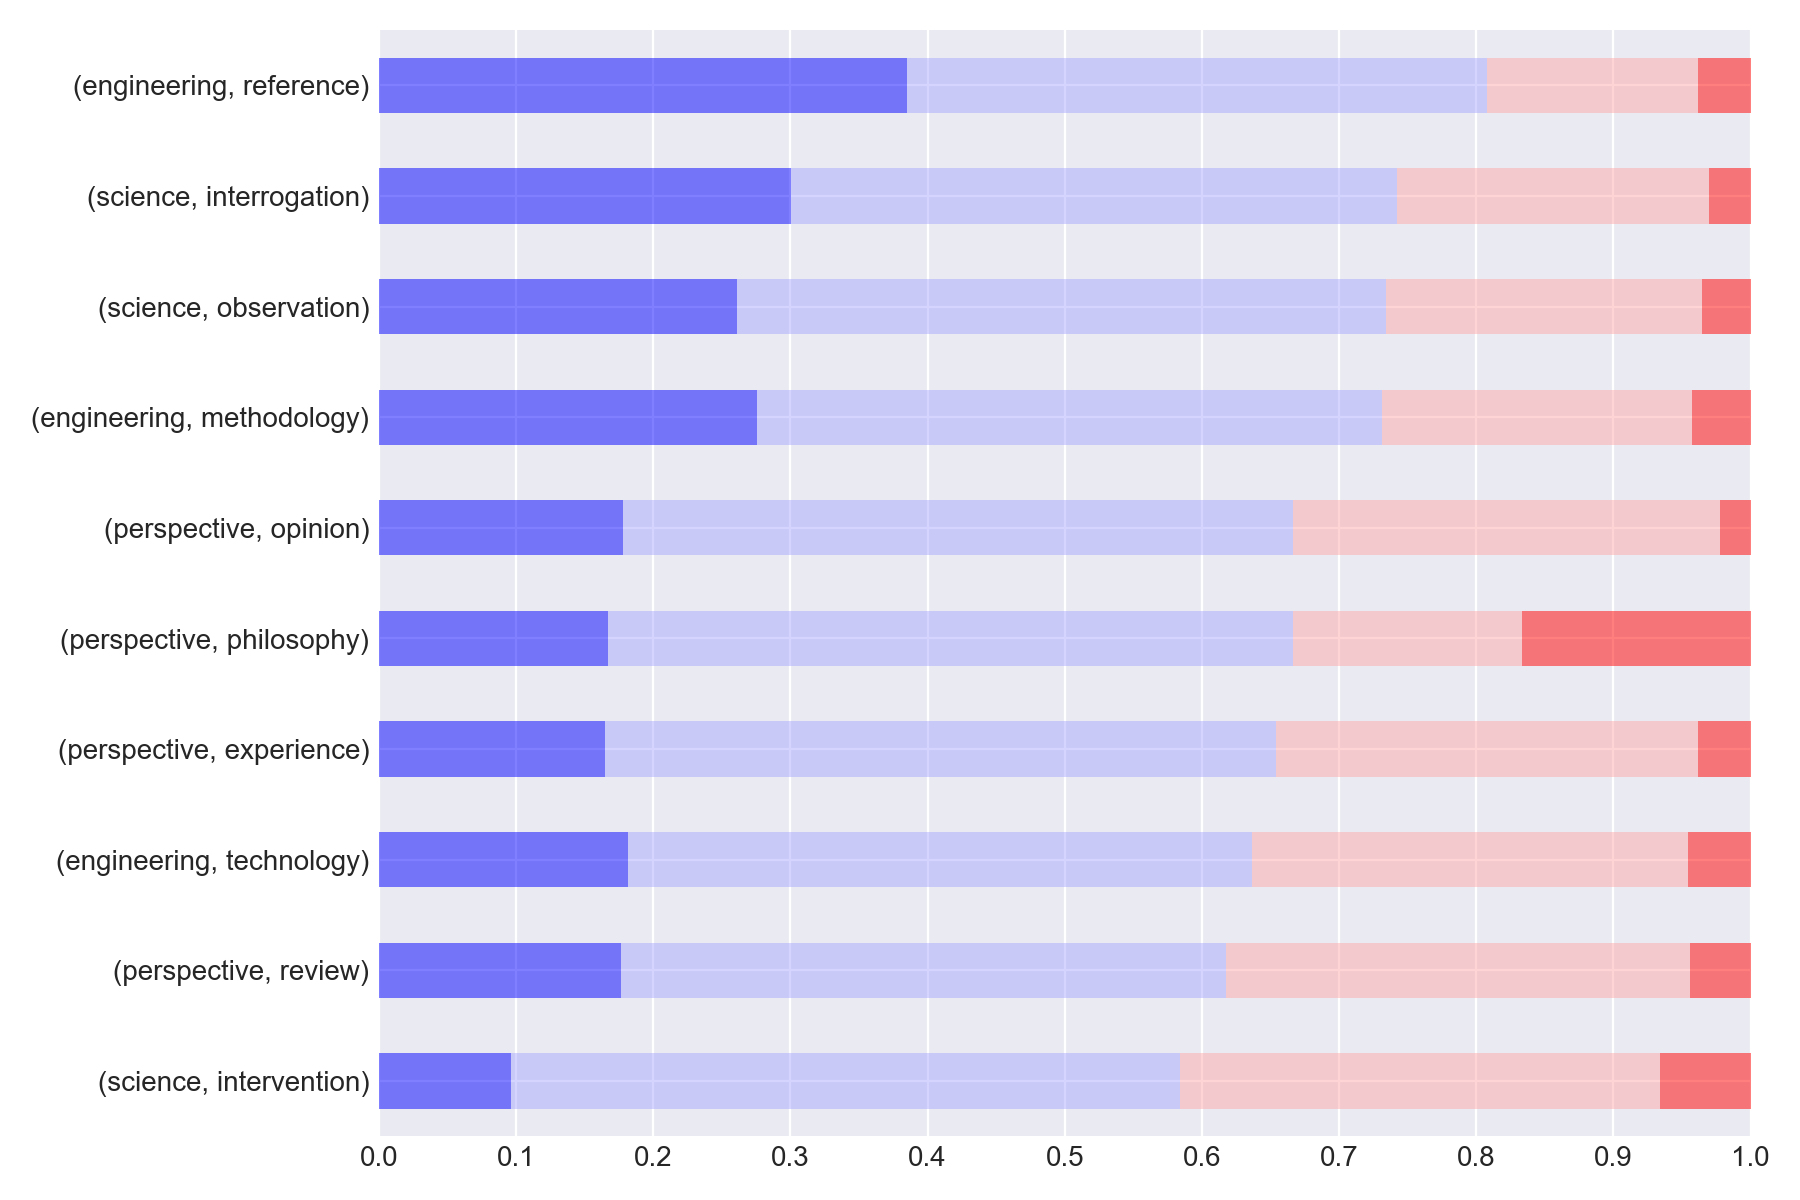

In [39]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['how'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='rel')
save_plot('papertags_method_how_relative')

In [41]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted
                      ).loc['how'].astype(int)

count                                      \
rating                    0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2     level_3                                                         
engineering methodology           244          403           200       38   
            reference              10           11             4        1   
            technology             28           70            49        7   
perspective experience             30           89            56        7   
            opinion                 8           22            14        1   
            philosophy              1            3             1        1   
            review                 12           30            23        3   
science     interrogation          70          103            53        7   
            intervention           19           96            69       13   
            observation           102          185            90       14   

                           pos  neg total  
rating                                     
level_2     level_3                        
engineering methodology    647  238   885  
            reference       21    5    26  
            technology      98   56   154  
perspective experience     119   63   182  
            opinion         30   15    45  
            philosophy       4    2     6  
            review          42   26    68  
science     interrogation  173   60   233  
            intervention   115   82   197  
            observation    287  104   391

In [40]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['how'].apply(np.round, decimals=2)

count                                      \
rating                    0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2     level_3                                                         
engineering methodology          0.28         0.46          0.23     0.04   
            reference            0.38         0.42          0.15     0.04   
            technology           0.18         0.45          0.32     0.05   
perspective experience           0.16         0.49          0.31     0.04   
            opinion              0.18         0.49          0.31     0.02   
            philosophy           0.17         0.50          0.17     0.17   
            review               0.18         0.44          0.34     0.04   
science     interrogation        0.30         0.44          0.23     0.03   
            intervention         0.10         0.49          0.35     0.07   
            observation          0.26         0.47          0.23     0.04   

                            pos   neg total  
rating                                       
level_2     level_3                          
engineering methodology    0.73  0.27   1.0  
            reference      0.81  0.19   1.0  
            technology     0.64  0.36   1.0  
perspective experience     0.65  0.35   1.0  
            opinion        0.67  0.33   1.0  
            philosophy     0.67  0.33   1.0  
            review         0.62  0.38   1.0  
science     interrogation  0.74  0.26   1.0  
            intervention   0.58  0.42   1.0  
            observation    0.73  0.27   1.0

#### With whom?

In [42]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=False
                      ).loc['withwhom'].astype(int)

count                                      \
rating                      0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2       level_3                                                         
laypeople     others                  0            0             1        0   
              students               13           75            57        9   
professionals academics               1            4             2        3   
              practitioners          53           76            32        2   

                             pos neg total  
rating                                      
level_2       level_3                       
laypeople     others           0   1     1  
              students        88  66   154  
professionals academics        5   5    10  
              practitioners  129  34   163

<IPython.core.display.Javascript object>


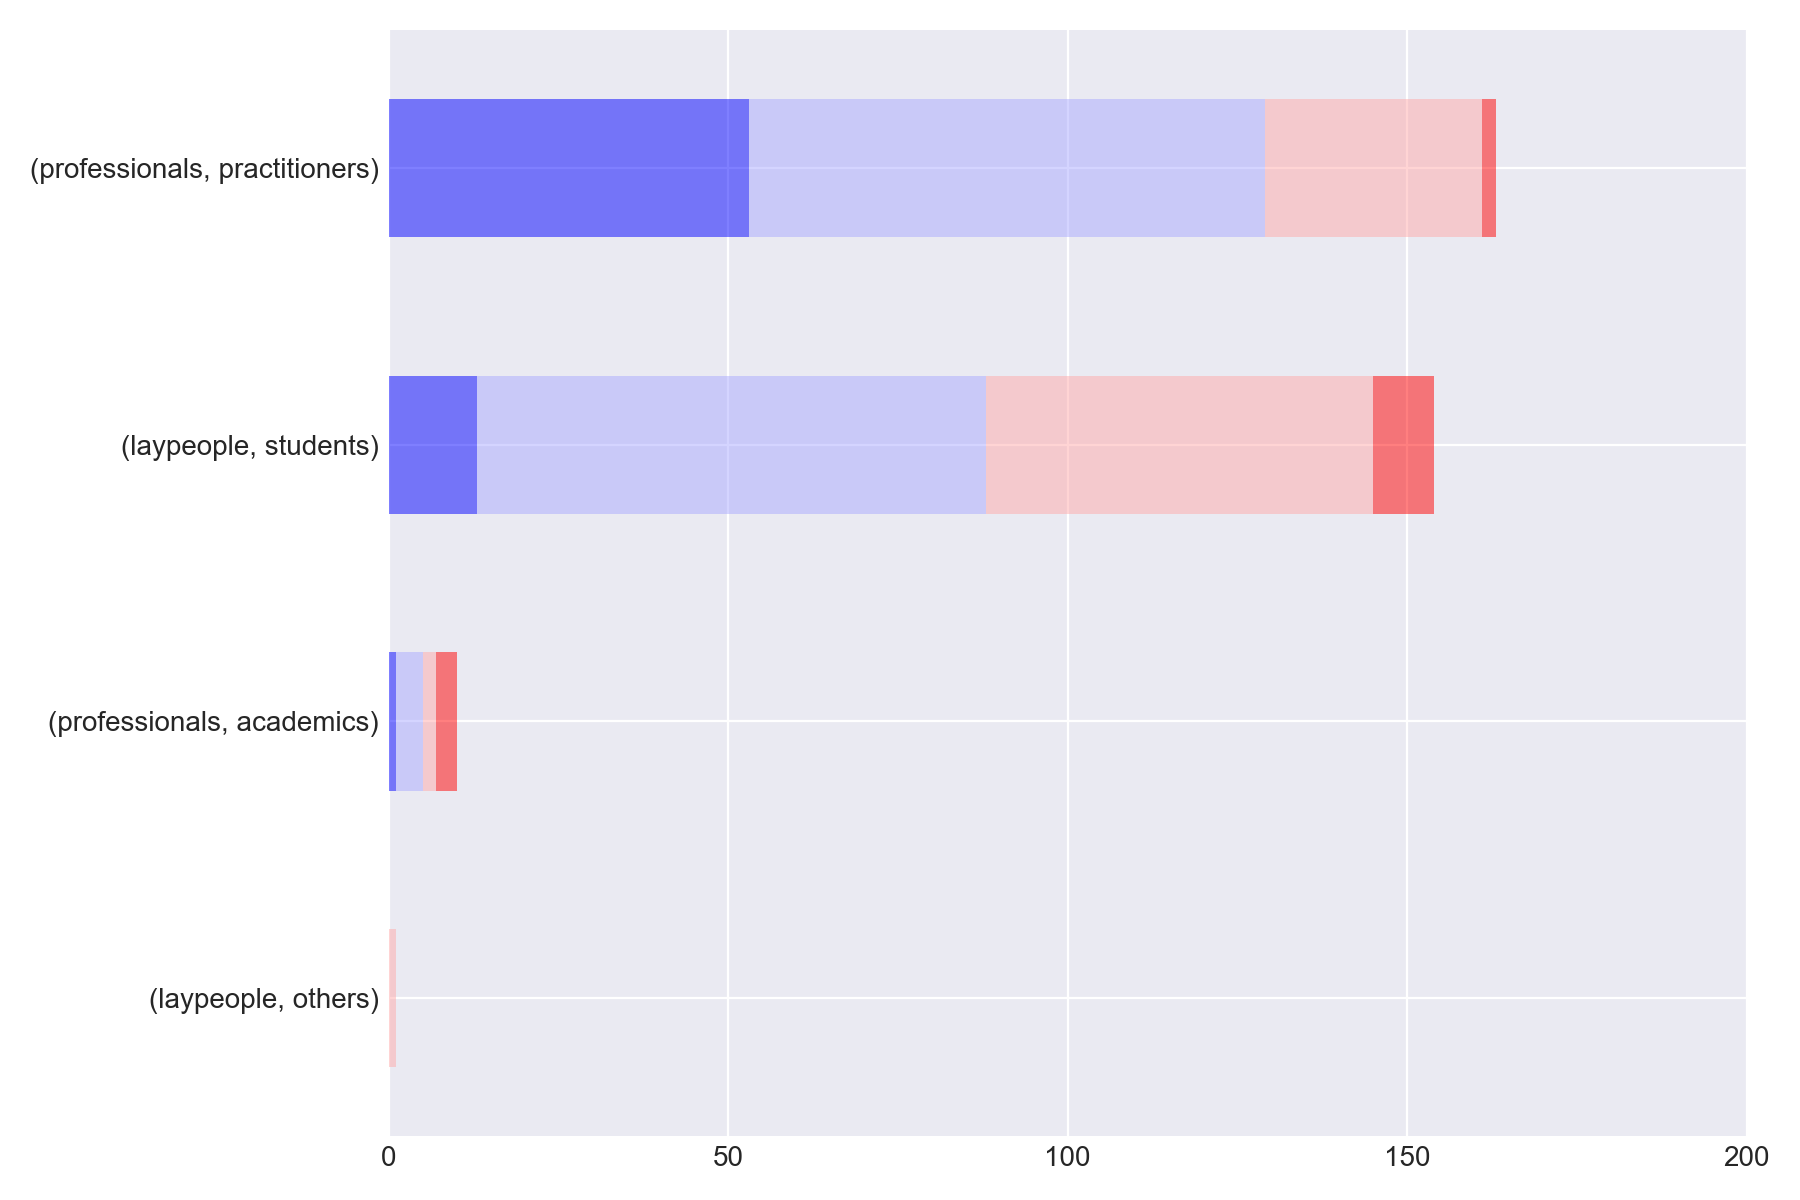

In [43]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=False
                      ).loc['withwhom'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='abs')
plt.xticks(range(0,201,50))
save_plot('papertags_method_withwhom_absolute')

In [44]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['withwhom'].apply(np.round, decimals=2)

count                                      \
rating                      0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_2       level_3                                                         
laypeople     others               0.00         0.00          1.00     0.00   
              students             0.08         0.49          0.37     0.06   
professionals academics            0.10         0.40          0.20     0.30   
              practitioners        0.33         0.47          0.20     0.01   

                              pos   neg total  
rating                                         
level_2       level_3                          
laypeople     others         0.00  1.00   1.0  
              students       0.57  0.43   1.0  
professionals academics      0.50  0.50   1.0  
              practitioners  0.79  0.21   1.0

<IPython.core.display.Javascript object>


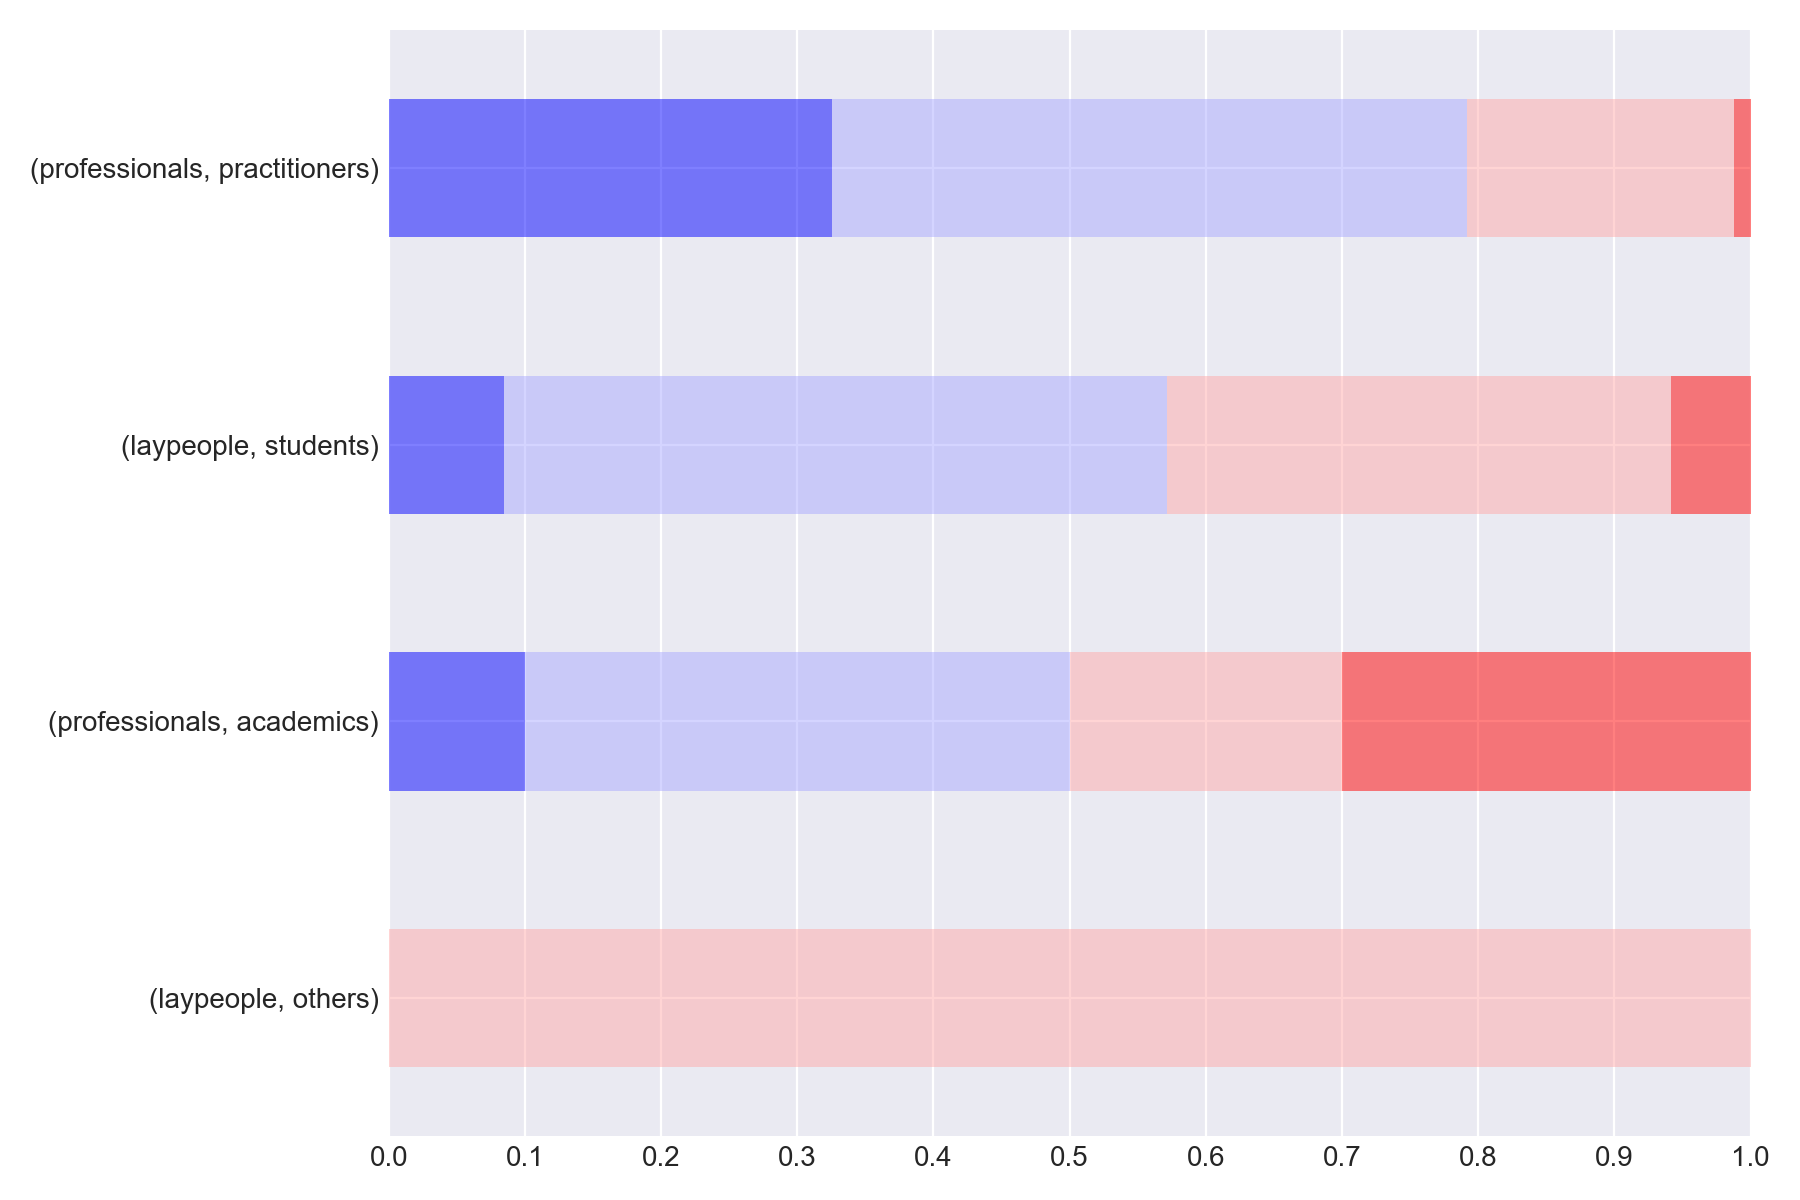

In [50]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_method, all_levels[:-1], all_ratings, all_ratings_sorted, rel=True
                      ).loc['withwhom'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='rel')
save_plot('papertags_method_withwhom_relative')

In [48]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=False
                      ).loc['what'].astype(int)

count               \
rating                                          0_Essential 1_Worthwhile   
level_2       level_3         level_4                                      
challenge     content         all                         8           17   
                              completeness               21           46   
                              consistency                20           39   
                              feasibility                 2            1   
                              traceability               61           99   
                              unambiguousness            22           35   
                              understandability          17           38   
              context         regulation                 27           46   
                              uncertainty                38           73   
              failure                                    11           23   
              people          collaboration              19           33   
                              communication              38           53   
                              skills                     14           58   
                              subjectivity               14           27   
              problem                                    13           25   
              process         automation                 49          110   
                              deciding                   24           49   
                              formalization               9           14   
                              improving                  36           82   
                              prioritization             15           46   
                              standardization            26           58   
                              visualization              12           27   
documentation artifacts                                  20           31   
              businessmodels                              1            3   
              diagrams                                    5           16   
              featuremodels                              12           30   
              goalmodels                                  1           16   
              naturallanguage                            53          118   
              prototypes                                  4            2   
              statemachines                               1            1   
...                                                     ...          ...   
domain        sector          public                      3           13   
                              subsea                      1            0   
                              supplier                    6            3   
              systemclass     adaptive                   13           16   
                              bi                          1            2   
                              complex                     3            4   
                              embedded                    2            3   
                              safetycritical             10           16   
general       framework                                   3            6   
              research                                    7           13   
information   architecture                               10           22   
              functional                                 10           30   
              goals                                      10           42   
              quality         all                        24           43   
                              performance                 3           18   
                              reliability                 3            4   
                              safety                      9           14   
                              security                   39           61   
                              sustainability              3            8   
                          

In [68]:
ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=False
                      ).loc['what'].loc['documentation']

count                                      \
rating                  0_Essential 1_Worthwhile 2_Unimportant 3_Unwise   
level_3         level_4                                                   
artifacts                      20.0         31.0          13.0      0.0   
businessmodels                  1.0          3.0           4.0      0.0   
diagrams                        5.0         16.0           9.0      1.0   
featuremodels                  12.0         30.0          14.0      1.0   
goalmodels                      1.0         16.0          11.0      4.0   
naturallanguage                53.0        118.0          68.0     12.0   
prototypes                      4.0          2.0           0.0      0.0   
statemachines                   1.0          1.0           2.0      0.0   
usecases                       12.0         25.0           6.0      6.0   
userstories                     6.0          6.0           6.0      0.0   

                           pos   neg  total  
rating                                       
level_3         level_4                      
artifacts                 51.0  13.0   64.0  
businessmodels             4.0   4.0    8.0  
diagrams                  21.0  10.0   31.0  
featuremodels             42.0  15.0   57.0  
goalmodels                17.0  15.0   32.0  
naturallanguage          171.0  80.0  251.0  
prototypes                 6.0   0.0    6.0  
statemachines              2.0   2.0    4.0  
usecases                  37.0  12.0   49.0  
userstories               12.0   6.0   18.0

<IPython.core.display.Javascript object>


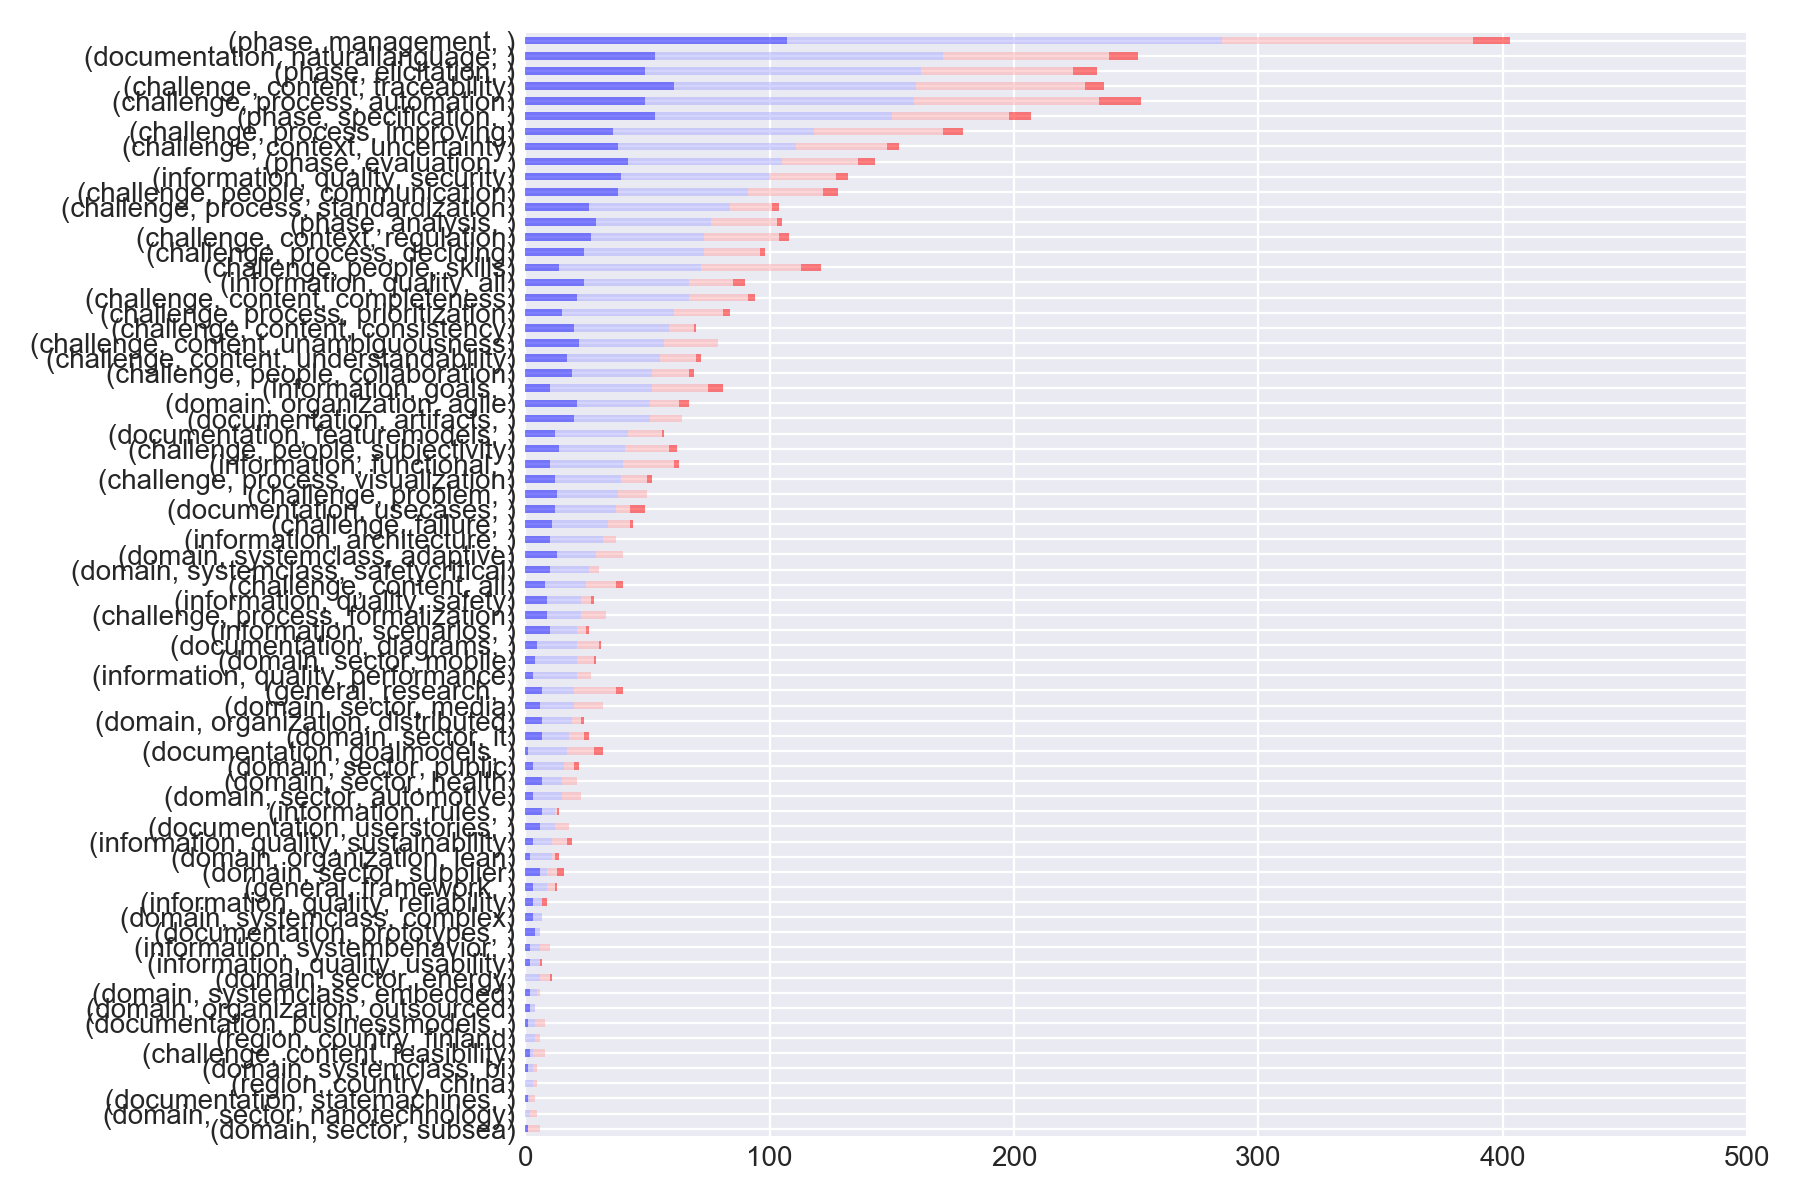

In [51]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=False
                      ).loc['what'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='abs')
save_plot('papertags_content_what_absolute')

<IPython.core.display.Javascript object>


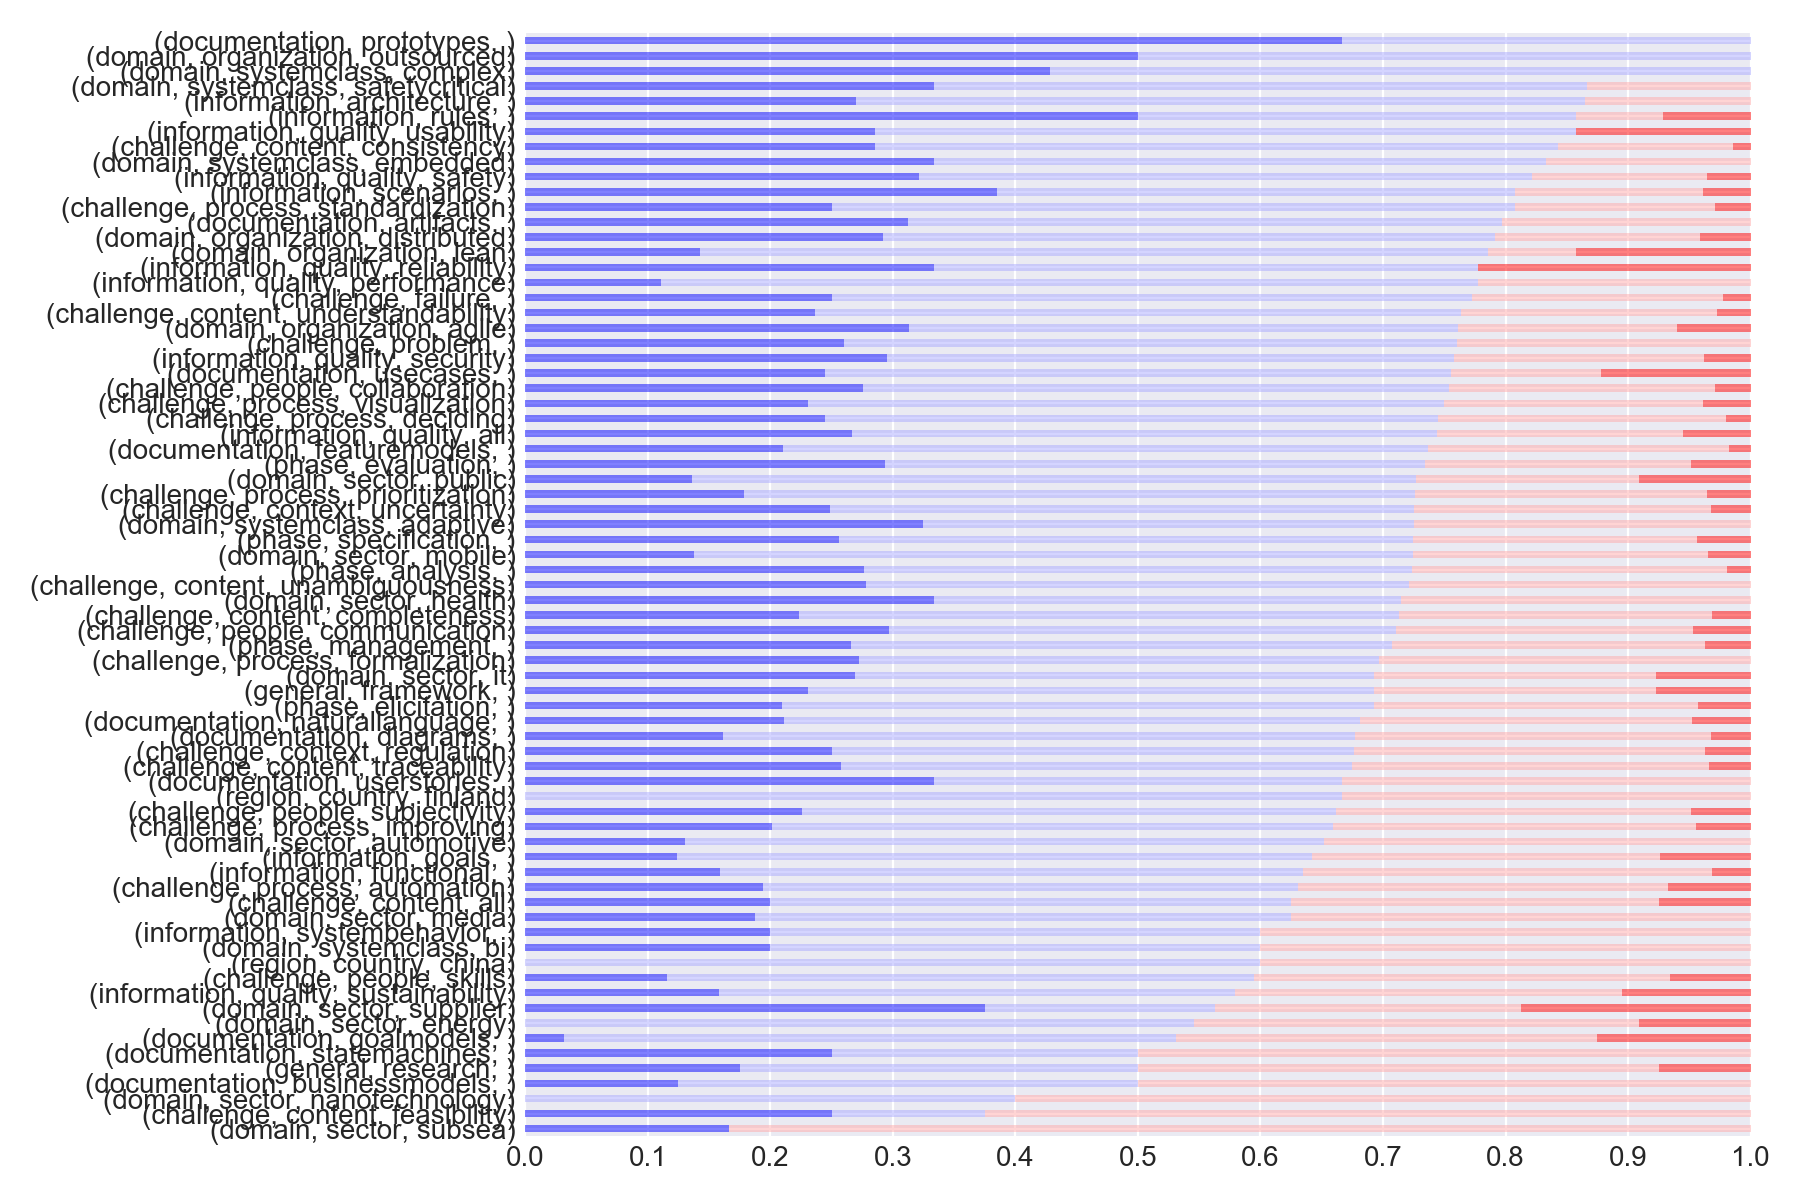

In [49]:
plot_tag_ratings(ratings_with_papertags(dfdict['truth_ratings'], 
                       papertags_content, all_levels, all_ratings, all_ratings_sorted, rel=True
                      ).loc['what'].sort_values([('pos'), ('count','0_Essential'), ('count','1_Worthwhile')], 
                                               na_position='first'), mode='rel')
save_plot('papertags_content_what_relative')

In [43]:
c = dfdict['truth_ratings'].groupby('lfdn').count()
c[c.rating >= 15].shape

(113, 2)

In [61]:
dfdict['truth_ratings'].head()

,lfdn,PaperID,rating
0,2,10,Worthwhile
1,2,23,Unwise
2,2,49,Essential
3,2,64,Unimportant
4,2,68,Unwise


#### Distribution of Ratings over Papers

<IPython.core.display.Javascript object>


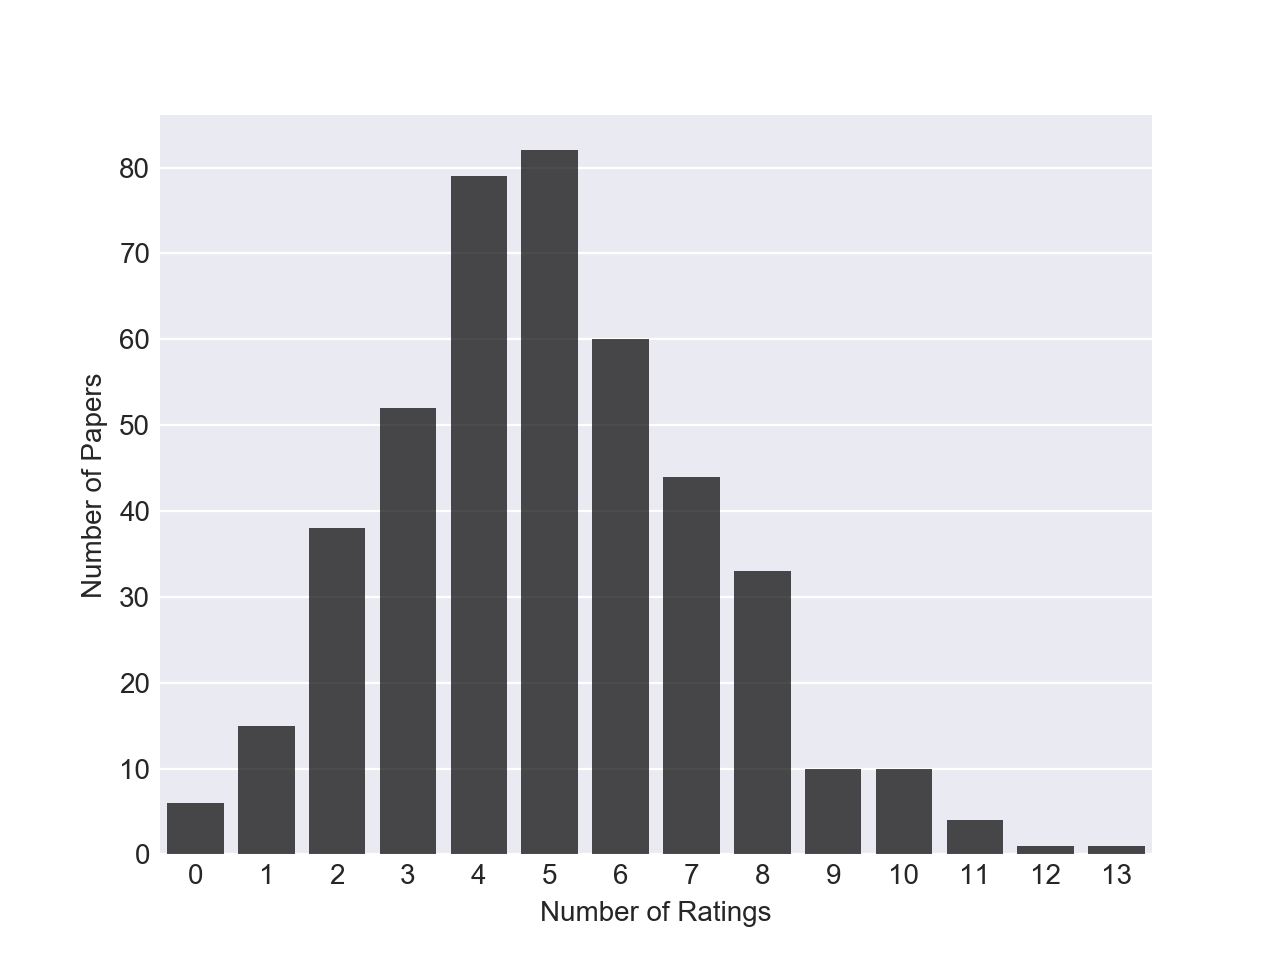

In [89]:
sns.countplot(dfdict['truth_ratings'][['PaperID', 'rating']].merge(
    dfdict['paper_metadata'][['PaperID']], how='outer').groupby('PaperID').count()['rating'], 
              color='k', alpha=0.7)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Papers')
save_plot('number_of_ratings_per_paper')

#### Distribution of Ratings over Respondents

<IPython.core.display.Javascript object>


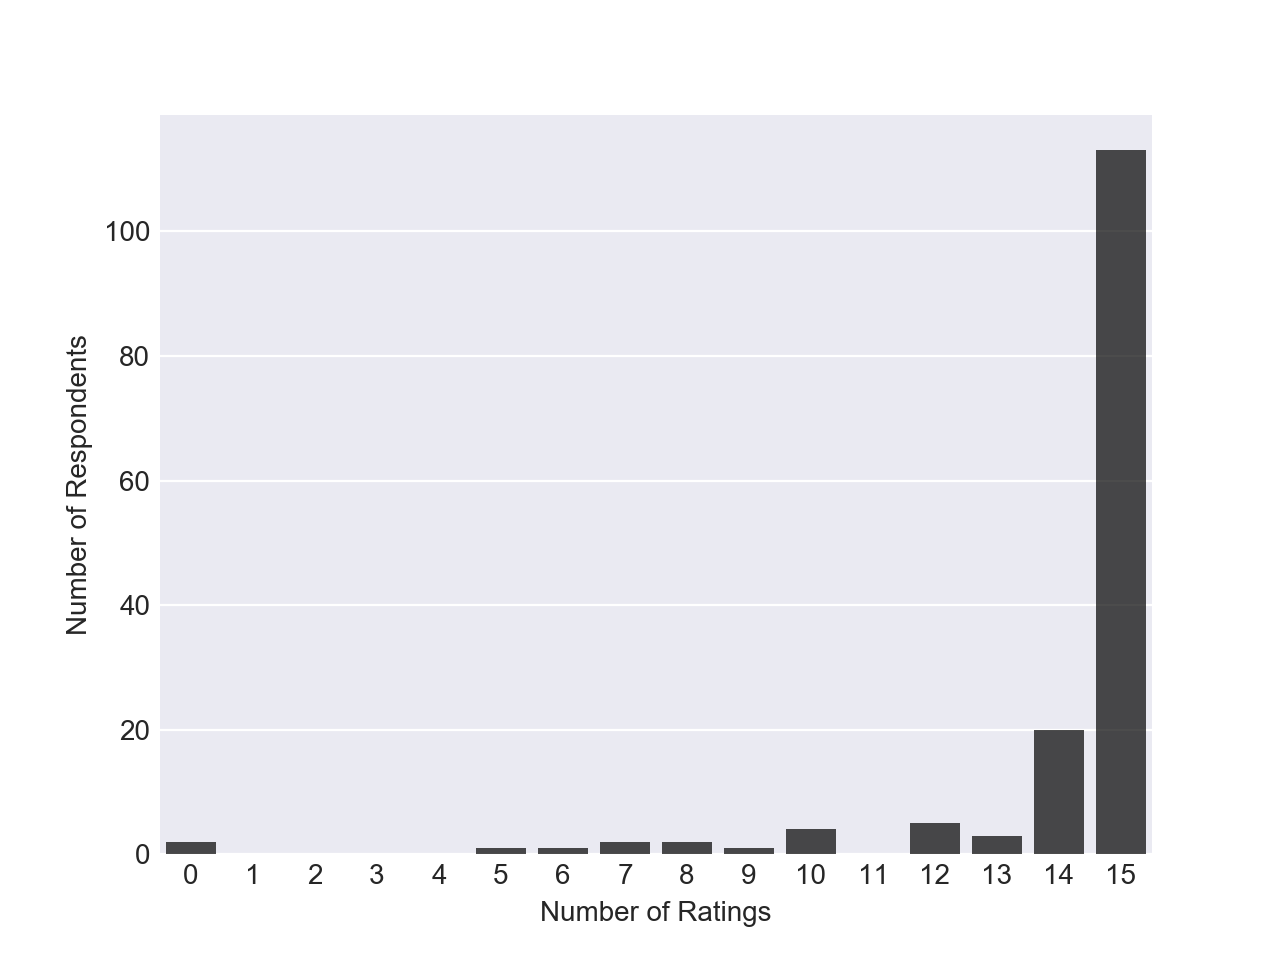

In [137]:
sns.countplot(dfdict['truth_ratings'][['lfdn', 'rating']].merge(
    dfdict['truth_metadata'], how='outer'
).groupby('lfdn').count()['rating'], order=list(range(16)), color='k', alpha=0.7)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Respondents')
save_plot('number_of_ratings_per_respondent')

<IPython.core.display.Javascript object>


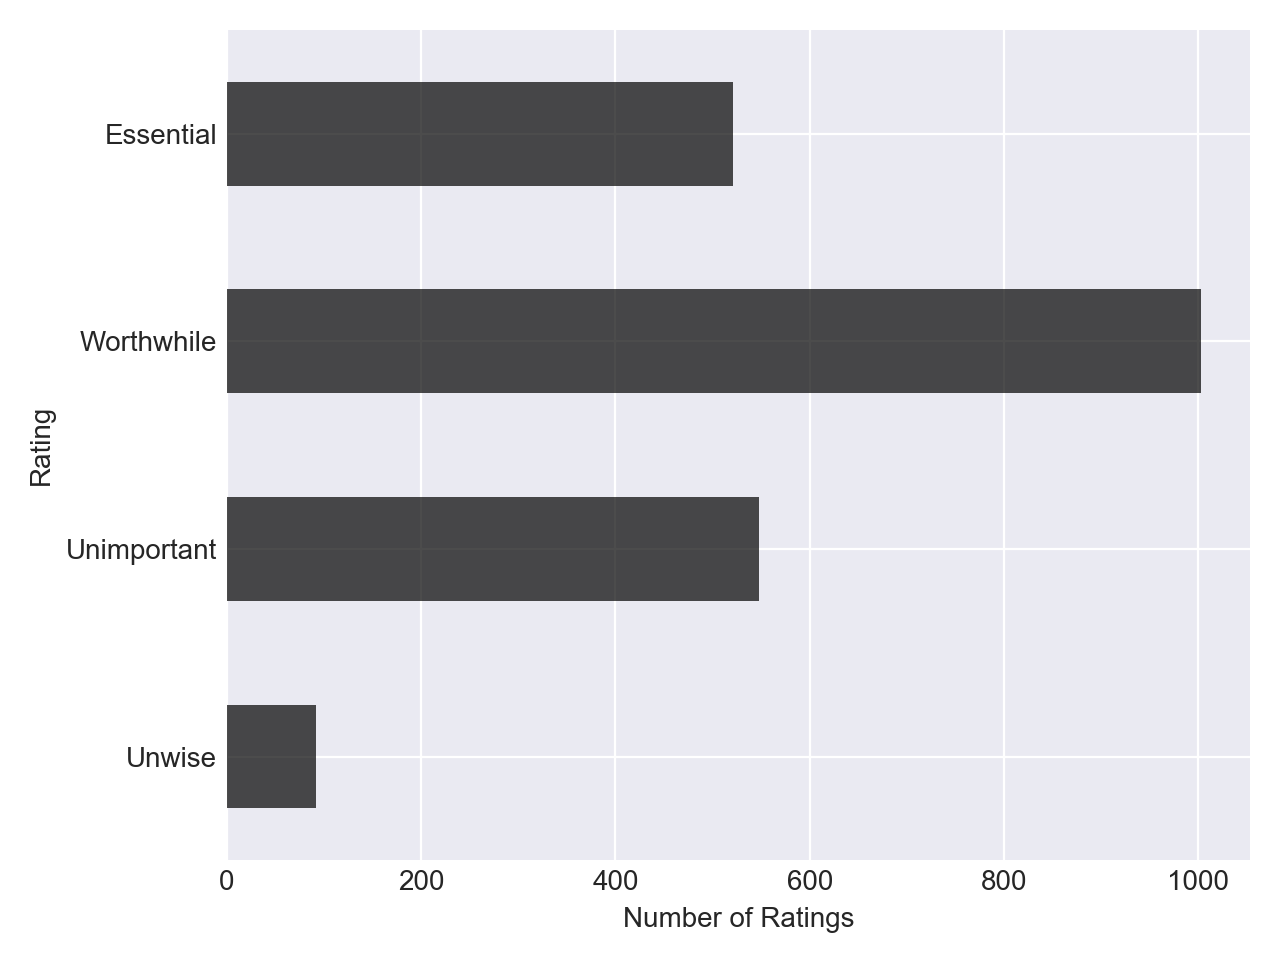

In [202]:
dfdict['truth_ratings'][['lfdn', 'rating']].merge(
    dfdict['truth_metadata'], how='outer'
).groupby('rating').count()[['lfdn']].T[['Unwise', 'Unimportant', 'Worthwhile', 'Essential']].loc['lfdn'].plot.barh(stacked=False, 
                                                                                                        color='k', alpha=0.7)
plt.ylabel('Rating')
plt.xlabel('Number of Ratings')
plt.tight_layout()
save_plot('number_of_ratings_per_likert_category')

In [201]:
0.5*0.95

0.475